<a href="https://colab.research.google.com/github/vbhaktha13/ML/blob/main/Copy_of_Project_tumor_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Melonoma tumor size prediction**
Malignant melanoma (see the image below) is a neoplasm of melanocytes or a neoplasm of the cells that develop from melanocytes. Although it was once considered uncommon, the annual incidence has increased dramatically over the past few decades. Surgery is the definitive treatment for **early-stage melanoma**, with medical management generally reserved for adjuvant treatment of high locally advanced melanoma and metastatic disease. We as a datascientist have a important responsiblity in saving lives by making the models
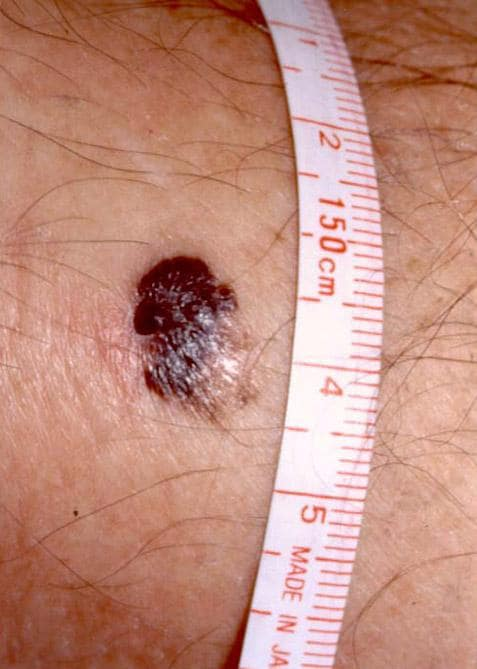

In [6]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-4rig7az9
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-4rig7az9
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=173953 sha256=efaa116a87d4c47defb37468728dcca3a9c6a6f0587a7176d9a29d43a403464e
  Stored in directory: /tmp/pip-ephem-wheel-cache-k8my6cgy/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [7]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [8]:
import pathlib

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Input 
from tensorflow.python.keras import layers
print(tf.__version__)

2.8.0


In [10]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

2.1 Get the **Data** 

In [11]:
url = 'https://raw.githubusercontent.com/vbhaktha13/datasets/bbce2c8b8346d240f444729ec349eaa49c73bbe0/tumor_train.csv'
tumor_train = pd.read_csv(url)

In [12]:
url = 'https://raw.githubusercontent.com/vbhaktha13/datasets/main/tumor_test.csv'
tumor_test = pd.read_csv(url)

In [13]:
tumor_train.head(5)

,Id,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,2484,8966.25,2290.10,0.25541,86.3614,1.210154e+06,123.099,3801.09,37,35.3347,2.040
1,7971,23451.80,5523.74,0.23553,318.7650,3.230021e+06,400.988,6233.68,154,19.8012,0.950
2,5808,9943.24,3395.25,0.34146,119.6230,1.314472e+06,182.907,4458.68,182,29.5710,1.383
3,3944,9217.15,1679.83,0.18225,89.1005,1.315326e+06,126.542,4173.45,43,32.0433,0.745
4,2304,12920.00,4785.19,0.37037,170.0430,1.773571e+06,203.413,4901.15,161,28.0393,6.830


In [14]:
tumor_train.shape

(7316, 11)

In [15]:
tumor_test.shape

(1830, 10)

In [16]:
tumor_train.isna().sum()

Id                0
mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

In [17]:
tumor_test.isna().sum()

Id                0
mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
dtype: int64

In [18]:
tumor_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,7316.0,4.572896e+03,2634.666726,1.00000,2298.750000,4.561500e+03,6.850250e+03,9.145000e+03
mass_npea,7316.0,9.903204e+03,4035.017571,2864.76000,6983.410000,8.894730e+03,1.213738e+04,3.699540e+04
size_npear,7316.0,3.033188e+03,1453.517395,520.33000,1986.167500,2.688000e+03,3.846613e+03,1.353500e+04
malign_ratio,7316.0,3.030910e-01,0.062637,0.12161,0.258622,3.006600e-01,3.431325e-01,5.253000e-01
damage_size,7316.0,1.039102e+02,55.303260,10.31010,64.011200,8.860810e+01,1.343580e+02,3.443460e+02
exposed_area,7316.0,1.372354e+06,561087.107307,387853.40250,959820.168650,1.238623e+06,1.696990e+06,4.978616e+06
std_dev_malign,7316.0,1.464097e+02,70.223909,31.97040,95.617575,1.266190e+02,1.825915e+02,5.288900e+02
err_malign,7316.0,3.979876e+03,1472.446085,1089.19000,3175.735000,3.849515e+03,4.671913e+03,5.303130e+04
malign_penalty,7316.0,6.996473e+01,55.756789,0.00000,31.000000,5.400000e+01,9.100000e+01,3.400000e+02
damage_ratio,7316.0,3.444139e+01,5.976883,15.22800,30.211175,3.523625e+01,3.882603e+01,4.654640e+01


observations:
min tumor size is zero and 20 is the max tumor size
damage ratio


In [19]:
tumor_train.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              7316 non-null   int64  
 1   mass_npea       7316 non-null   float64
 2   size_npear      7316 non-null   float64
 3   malign_ratio    7316 non-null   float64
 4   damage_size     7316 non-null   float64
 5   exposed_area    7316 non-null   float64
 6   std_dev_malign  7316 non-null   float64
 7   err_malign      7316 non-null   float64
 8   malign_penalty  7316 non-null   int64  
 9   damage_ratio    7316 non-null   float64
 10  tumor_size      7316 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 628.8 KB


In [20]:
tumor_test.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1830 non-null   int64  
 1   mass_npea       1830 non-null   float64
 2   size_npear      1830 non-null   float64
 3   malign_ratio    1830 non-null   float64
 4   damage_size     1830 non-null   float64
 5   exposed_area    1830 non-null   float64
 6   std_dev_malign  1830 non-null   float64
 7   err_malign      1830 non-null   float64
 8   malign_penalty  1830 non-null   int64  
 9   damage_ratio    1830 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 143.1 KB


In [21]:
column_names = ['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','damage_ratio','tumor_size','std_dev_malign','err_malign','malign_penalty']

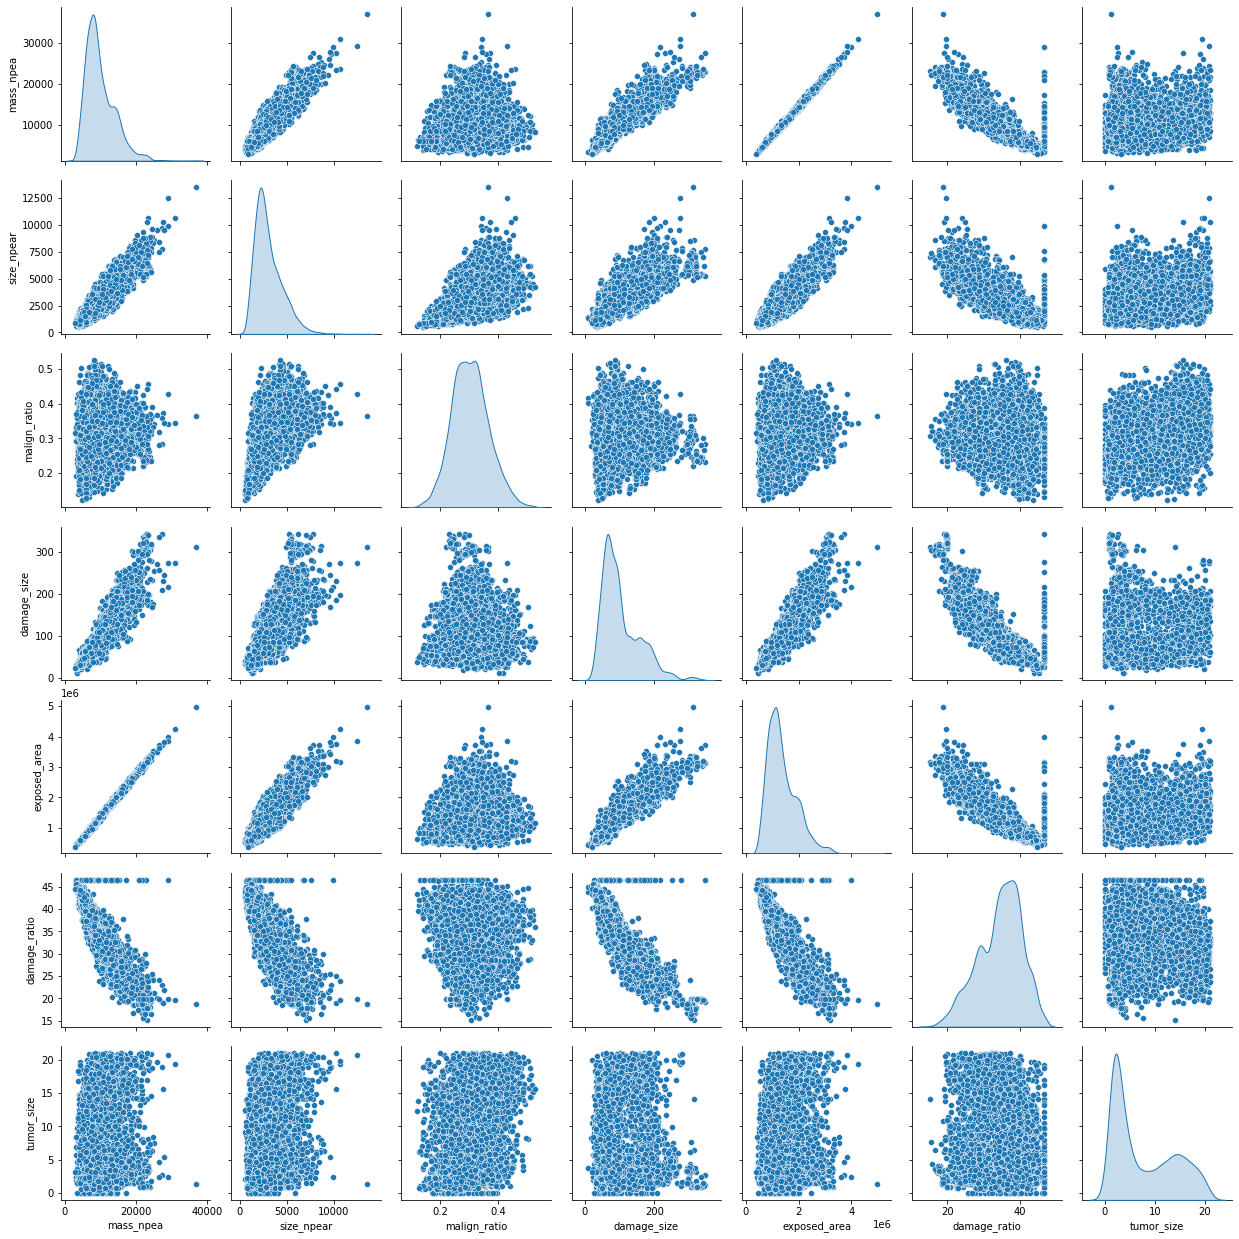

In [22]:
sns.pairplot(tumor_train[['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','damage_ratio','tumor_size']],diag_kind="kde")

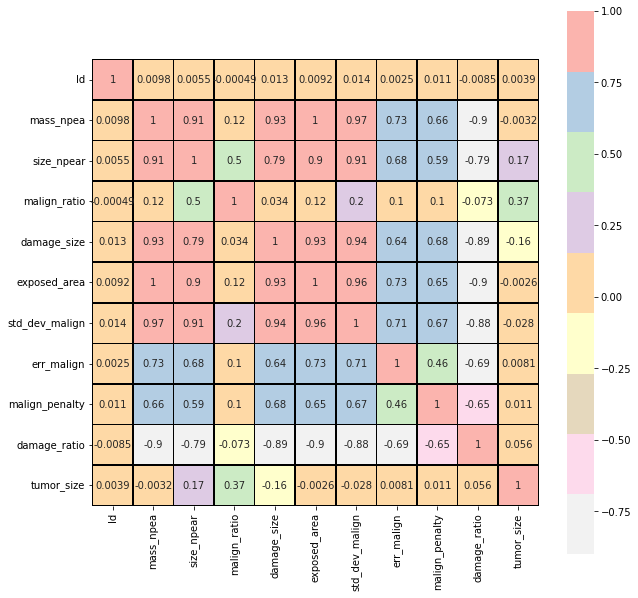

In [23]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tumor_train.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax)

Strong correlations are observed in some variables such as std_dev_malign, mass_npea, size_npear, damage_size,exposed_area, damage_ratio , multi-collinear dataset

**UniVariate**

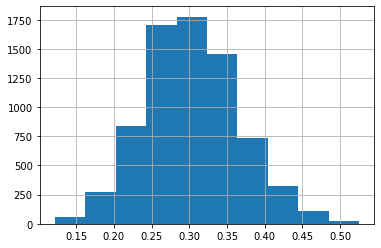

In [24]:
tumor_train['malign_ratio'].hist()

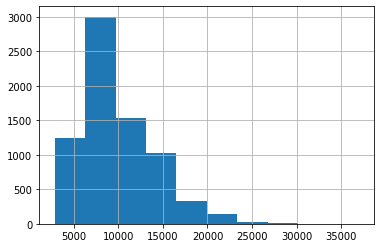

In [25]:
tumor_train['mass_npea'].hist()

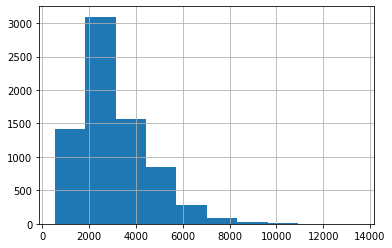

In [26]:
tumor_train['size_npear'].hist()

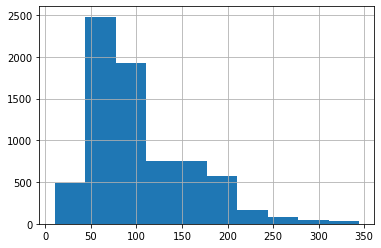

In [27]:
tumor_train['damage_size'].hist()

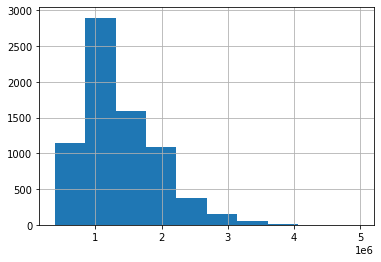

In [28]:
tumor_train['exposed_area'].hist()

**Outlier check**

In [29]:
tumor_train['tumor_size'].value_counts().head(20)

0.000     43
2.850      7
2.006      7
2.012      6
1.820      6
2.243      6
1.529      6
1.730      6
15.852     6
1.645      6
2.227      5
1.969      5
2.558      5
1.880      5
1.781      5
1.973      5
1.590      5
2.480      5
2.379      5
1.317      5
Name: tumor_size, dtype: int64

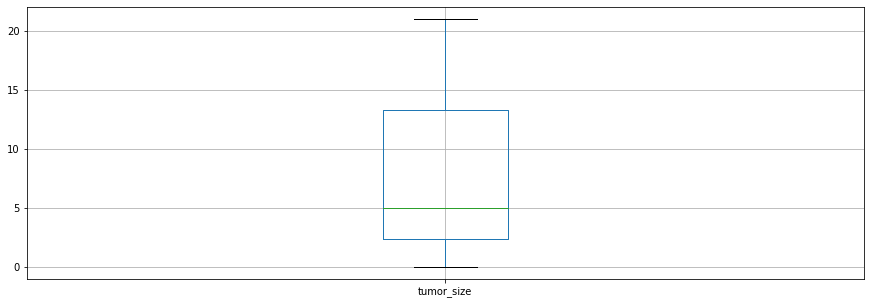

In [30]:
plt.figure(figsize=(15,5))
tumor_train.boxplot(column='tumor_size')

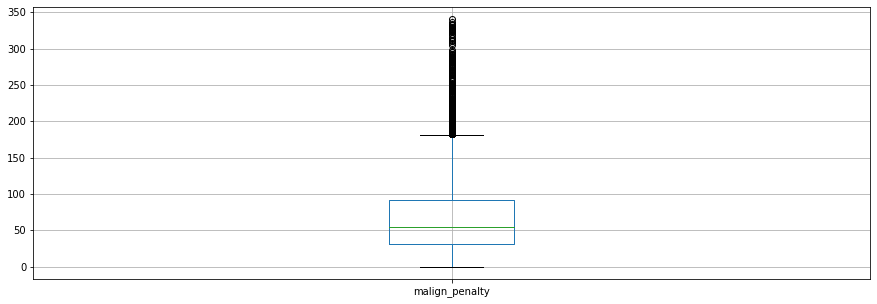

In [31]:
plt.figure(figsize=(15,5))
tumor_train.boxplot(column='malign_penalty')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


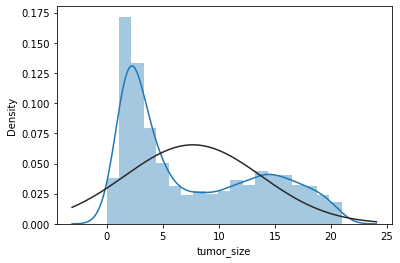

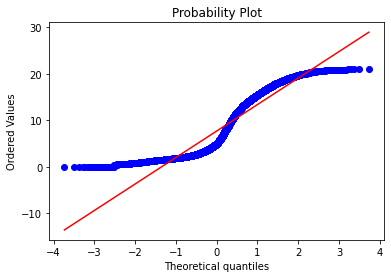

In [32]:
from scipy import stats
from scipy.stats import norm
sns.distplot(tumor_train['tumor_size'],fit=norm);
fig = plt.figure()
res = stats.probplot(tumor_train['tumor_size'], plot=plt)

There is no missing data but instead we have a different obstacle that we have to overcome - bimodal distribution of the target variable.

In [33]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(tumor_train['tumor_size'].values.reshape(-1, 1))

tumor_train['target_class'] = gmm.predict(tumor_train['tumor_size'].values.reshape(-1, 1))

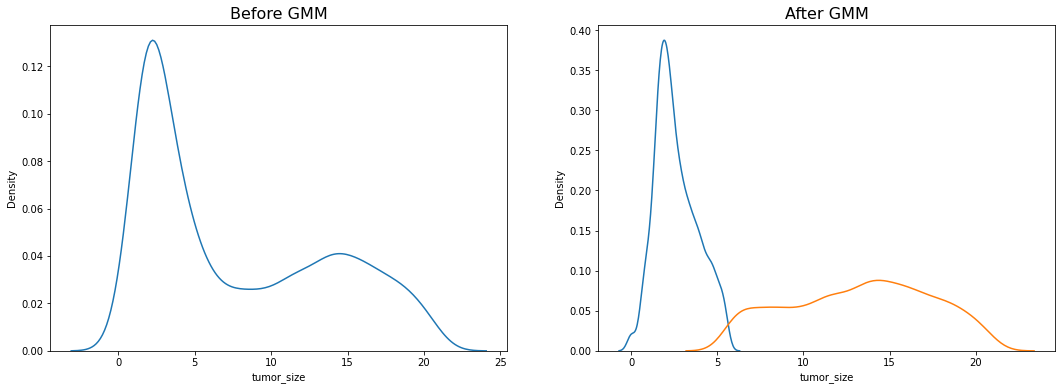

In [34]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=tumor_train.tumor_size, ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=tumor_train[tumor_train.target_class==0].tumor_size, label='Component 1', ax=ax[1])
sns.kdeplot(data=tumor_train[tumor_train.target_class==1].tumor_size, label='Component 2', ax=ax[1])
ax[1].set_title('After GMM', fontsize=16)
plt.show()

Text(0, 0.5, 'malignant dimension')

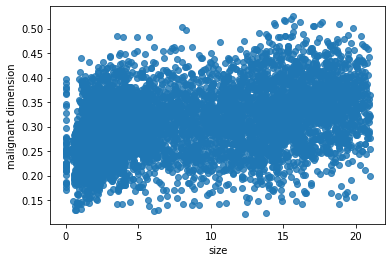

In [35]:
sns.regplot(x=tumor_train['tumor_size'],y=tumor_train['malign_ratio'])
plt.xlabel('size')
plt.ylabel('malignant dimension')

Text(0, 0.5, 'damage size')

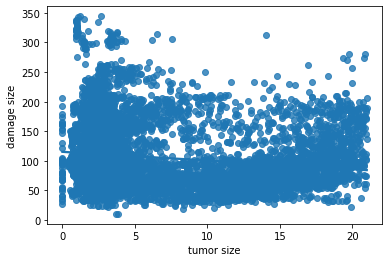

In [36]:
sns.regplot(x=tumor_train['tumor_size'],y=tumor_train['damage_size'])
plt.xlabel('tumor size')
plt.ylabel('damage size')

In [37]:
tumor_train.drop_duplicates()

,Id,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size,target_class
0,2484,8966.25,2290.10,0.25541,86.3614,1.210154e+06,123.099,3801.09,37,35.3347,2.040,0
1,7971,23451.80,5523.74,0.23553,318.7650,3.230021e+06,400.988,6233.68,154,19.8012,0.950,0
2,5808,9943.24,3395.25,0.34146,119.6230,1.314472e+06,182.907,4458.68,182,29.5710,1.383,0
3,3944,9217.15,1679.83,0.18225,89.1005,1.315326e+06,126.542,4173.45,43,32.0433,0.745,0
4,2304,12920.00,4785.19,0.37037,170.0430,1.773571e+06,203.413,4901.15,161,28.0393,6.830,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7311,5734,9361.41,2528.50,0.27009,84.3511,1.325701e+06,112.873,4848.03,22,32.4855,1.834,0
7312,5191,8421.81,1834.31,0.21780,78.0380,1.176470e+06,108.480,3788.68,17,34.3080,3.105,0
7313,5390,10505.40,3627.73,0.34532,114.5010,1.494560e+06,173.520,4599.82,163,30.5576,15.176,1
7314,860,7727.78,3552.67,0.45972,85.4398,9.519829e+05,144.014,2449.99,117,39.7190,7.927,1


In [38]:
tumor_train.shape

(7316, 12)

**spliting dataset into X,Y**

In [39]:
#16. Train, test split
from sklearn.model_selection import train_test_split
tumor_train_labels = ['mass_npea','size_npear','malign_ratio','damage_size','exposed_area','damage_ratio','std_dev_malign','err_malign','malign_penalty']
X=tumor_train[tumor_train_labels]
y = tumor_train['tumor_size']
X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.2,random_state=0 )
X_test = tumor_test

In [40]:
X_train.shape
#val_data = tumor_train.drop(tumor_train.index)

(5852, 9)

In [41]:
y_train.shape  #tumor_train_labels = tumor_train.pop('tumor_size')

(5852,)

In [42]:
X_val.shape

(1464, 9)

In [43]:
X_test.shape

(1830, 10)

In [44]:
X_train_stats=X_train.describe().transpose()
X_train_stats

,count,mean,std,min,25%,50%,75%,max
mass_npea,5852.0,9.897795e+03,4036.787667,2864.76000,6959.735000,8.899470e+03,1.213738e+04,3.699540e+04
size_npear,5852.0,3.031573e+03,1453.431324,520.33000,1979.502500,2.690525e+03,3.847240e+03,1.353500e+04
malign_ratio,5852.0,3.029813e-01,0.062330,0.12161,0.258740,3.002550e-01,3.430600e-01,5.199200e-01
damage_size,5852.0,1.037784e+02,55.279917,10.68910,63.814450,8.856385e+01,1.346095e+02,3.443460e+02
exposed_area,5852.0,1.371276e+06,561587.609511,387853.40250,955918.470300,1.238465e+06,1.698803e+06,4.978616e+06
damage_ratio,5852.0,3.447308e+01,5.969677,15.22800,30.250475,3.527240e+01,3.888115e+01,4.654640e+01
std_dev_malign,5852.0,1.464527e+02,70.345754,31.97040,95.162450,1.266260e+02,1.823015e+02,5.288900e+02
err_malign,5852.0,3.973117e+03,1374.301273,1137.38000,3168.405000,3.850130e+03,4.668573e+03,2.296356e+04
malign_penalty,5852.0,6.944686e+01,55.319504,0.00000,31.000000,5.400000e+01,9.100000e+01,3.400000e+02


# **Feature Importance**

Feature: 0, Score: 0.00186
Feature: 1, Score: 0.00146
Feature: 2, Score: 17.19825
Feature: 3, Score: -0.11430
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.09785
Feature: 6, Score: -0.02461
Feature: 7, Score: -0.00041
Feature: 8, Score: 0.01476


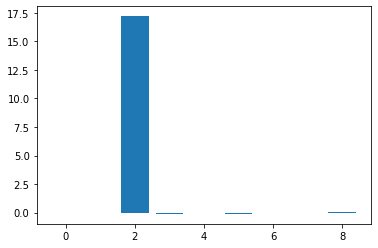

In [45]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model=LinearRegression()
model.fit(X,y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [46]:
features = pd.DataFrame(model.coef_,tumor_train_labels)
features.columns = ['Coeffecient']

features

,Coeffecient
mass_npea,0.001856
size_npear,0.001459
malign_ratio,17.198248
damage_size,-0.114305
exposed_area,-0.000005
damage_ratio,-0.097848
std_dev_malign,-0.024608
err_malign,-0.000415
malign_penalty,0.014759


# Normalization of data

In [47]:
X_train_norm = (X_train - X_train_stats['mean']) / X_train_stats['std']


In [48]:
X_val_norm = (X_val - X_train_stats['mean']) / X_train_stats['std']

In [49]:
X_test_norm = (X_test - X_train_stats['mean']) / X_train_stats['std']

In [50]:
X_train_norm.head(5)

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,damage_ratio,std_dev_malign,err_malign,malign_penalty
5519,-0.502953,-0.420414,0.075062,-0.780061,-0.475979,0.577523,-0.696642,-0.760566,-0.948072
5321,-0.296983,-0.835762,-1.510198,-0.416392,-0.235540,0.082152,-0.629387,-0.026076,-0.984225
401,-1.370334,-1.129508,0.246407,-1.227403,-1.362162,1.704334,-1.322125,-1.880037,-0.948072
5153,-1.221183,-1.371866,-1.510038,-1.096728,-1.235539,1.425022,-1.141303,-0.940941,-1.056533
5748,0.811364,0.664268,0.007038,0.888199,0.773547,-0.761679,0.657955,0.439862,-0.478075


In [57]:
input_shape=X_train.shape
input_shape

(5852, 9)

# Model
**Lets build the model**

In [58]:
def build_model():
  model = keras.models.Sequential()
  model.add(Dense(256, input_shape=X_train.shape, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1))
# compile the keras model
  model.compile(loss='mse', optimizer='RMSprop', metrics=['mae','mse'])
  model.build(input_shape)
  return model

In [60]:
model= build_model()

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (5852, 256)              2560      
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (5852, 128)              32896     
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (5852, 1)                129       
 pper)                                                           
                                                                 
Total params: 35,585
Trainable params: 35,585
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from matplotlib import pyplot
from keras import backend
 

 
# fit the keras model on the dataset and train
history =model.fit(X_train, y_train, epochs=15, batch_size=9,verbose=2)
# evaluate the keras model

print("Baseline: %.2f (%.2f) MSE" )

# plot metrics
#pyplot.plot(history.history['mean_squared_error'])
#pyplot.show()


In [ ]:
model = build_model()

# Inspect the model

In [ ]:
model.summary()